In [15]:
import os
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
cwd = os.getcwd()
clean_user_data = pd.read_csv(cwd+'\\Data\\user_details_clean.csv', encoding='utf-8')

In [90]:
clean_user_data = clean_user_data.fillna(0)
clean_user_data['Tenure'] = clean_user_data['Tenure'] / 365
clean_user_data = clean_user_data.round({'Tenure': 0})
clean_user_data['Tenure'] = clean_user_data['Tenure'].apply(int)
#bucket the Tenure Groups
clean_user_data['Tenure_Group'] = 'N/A'
clean_user_data.loc[clean_user_data['Tenure'] < 1,'Tenure_Group'] = '< 1 yr'
clean_user_data.loc[(clean_user_data['Tenure'] >= 1) & (clean_user_data['Tenure'] < 4 ), 'Tenure_Group'] = '1 to 3 yrs'
clean_user_data.loc[(clean_user_data['Tenure'] >= 4) & (clean_user_data['Tenure'] < 8 ), 'Tenure_Group'] = '4 to 8 yrs'
clean_user_data.loc[clean_user_data['Tenure'] >= 8,'Tenure_Group'] = '> 8 yrs'
clean_user_data['Tenure_Group'] = clean_user_data['Tenure_Group'].astype(str)
clean_user_data['Tenure'] = clean_user_data['Tenure'].astype(str)

25% --> 1.0
50% --> 2.0
75% --> 4.0
95% --> 8.0


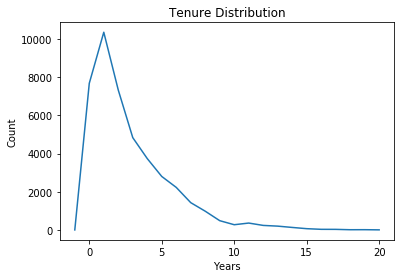

In [21]:
tenure = list(clean_user_data['Tenure'].astype(int).tolist())

nk = collections.Counter(tenure)

x = []
y = []
for k in sorted(nk):
    x.append(k)
    y.append(nk[k])

p_25 = np.percentile(tenure, 25)
median = np.percentile(tenure, 50)
p_75 = np.percentile(tenure, 75)
p_95 = np.percentile(tenure, 95)

print('25% --> '+str(p_25))
print('50% --> '+str(median))
print('75% --> '+str(p_75))
print('95% --> '+str(p_95))
    
plt.plot(x,y)
plt.title('Tenure Distribution')
plt.ylabel("Count")
plt.xlabel("Years")
plt.show()

In [91]:
other = []
for k, v in collections.Counter(clean_user_data['WorkLocation'].tolist()).items():
    if v < 50:
        other.append(k)
        
clean_user_data['WorkLocation'] = np.where(clean_user_data['WorkLocation'].isin(other), "Other", clean_user_data['WorkLocation'])

worklocation_count = collections.Counter(clean_user_data['WorkLocation'].tolist())
#print(worklocation_count)

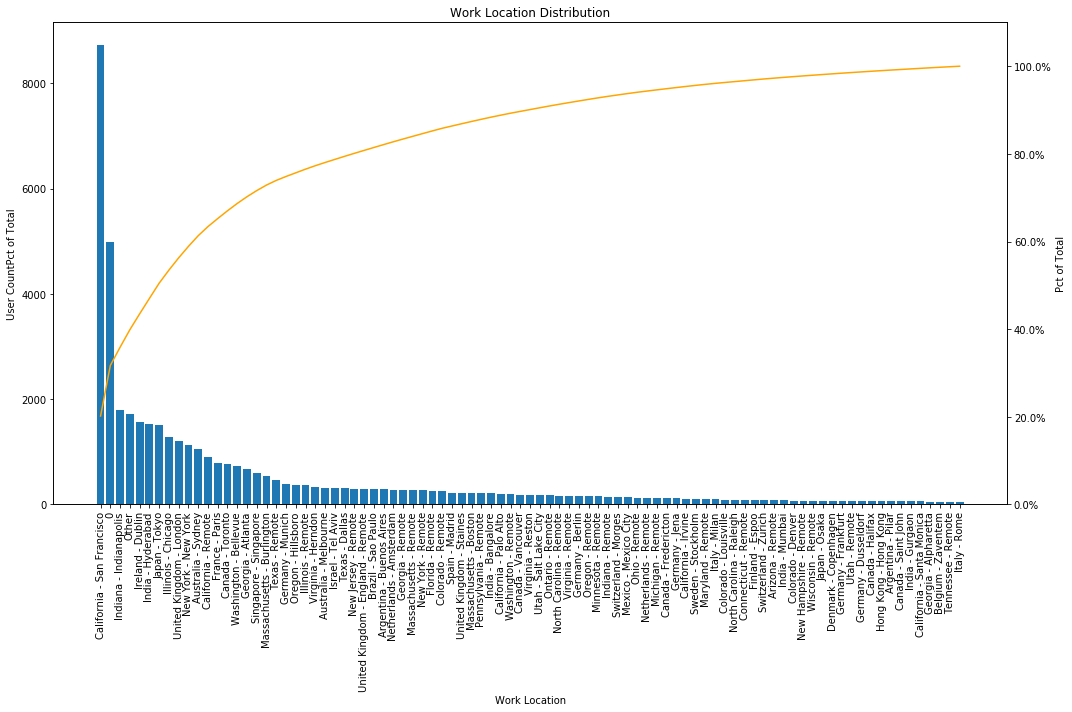

In [107]:
wl = list(clean_user_data['WorkLocation'].astype(str).tolist())
nk = collections.Counter(wl)

x = []
y = []
for k in sorted(nk, key=nk.get, reverse=True):
    x.append(k)
    y.append(nk[k])

y2 = []
cum = []
for i in y:
    y2.append(i/np.sum(y)*100)
    cum.append(round(np.cumsum(y2)[-1],3))

#print(cum)

fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
plt.title('Work Location Distribution')

ax1.set_xlabel('Work Location')
ax1.set_ylabel('User CountPct of Total')
ax1.bar(x,y)

for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Pct of Total')  # we already handled the x-label with ax1
ax2.plot(x,cum, color='orange')
plt.ylim((0,110))
vals = ax2.get_yticks()
ax2.set_yticklabels(['%1.1f%%' %i for i in vals])

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [42]:
df = pd.DataFrame.from_dict(nk, orient='index').reset_index()
df.to_csv(cwd+'\\worklocation_counts.csv')

In [99]:
clean_user_data = clean_user_data.fillna(0)
#bucket the jobgrades
clean_user_data['JobGrade'] = clean_user_data['JobGrade'].apply(int)
#bucket the Tenure Groups
clean_user_data['JobGrade_Group'] = 'N/A'
clean_user_data.loc[clean_user_data['JobGrade'] == 0,'JobGrade_Group'] = 'N/A'
clean_user_data.loc[(clean_user_data['JobGrade'] >= 1) & (clean_user_data['JobGrade'] < 4 ), 'JobGrade_Group'] = '< 4'
clean_user_data.loc[(clean_user_data['JobGrade'] >= 4) & (clean_user_data['JobGrade'] < 7 ), 'JobGrade_Group'] = '4 to 6'
clean_user_data.loc[(clean_user_data['JobGrade'] >= 7) & (clean_user_data['JobGrade'] < 12 ), 'JobGrade_Group'] = '7 to 11'
clean_user_data.loc[clean_user_data['JobGrade'] >= 12,'JobGrade_Group'] = '> 11'

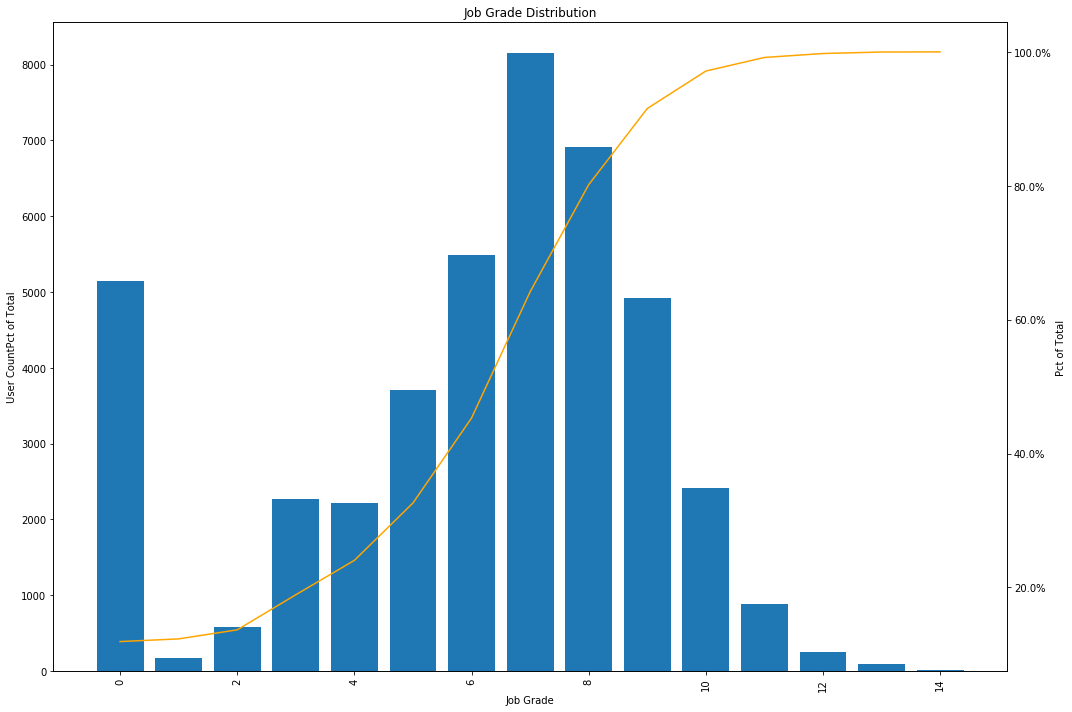

In [106]:
wl = list(clean_user_data['JobGrade'].astype(int).tolist())
nk = collections.Counter(wl)

x = []
y = []
for k in sorted(nk): #, key=nk.get, reverse=True
    x.append(k)
    y.append(nk[k])

y2 = []
cum = []
for i in y:
    y2.append(i/np.sum(y)*100)
    cum.append(round(np.cumsum(y2)[-1],3))

#print(cum)

fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
plt.title('Job Grade Distribution')

ax1.set_xlabel('Job Grade')
ax1.set_ylabel('User CountPct of Total')
ax1.bar(x,y)

for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Pct of Total')  # we already handled the x-label with ax1
ax2.plot(x,cum, color='orange')
vals = ax2.get_yticks()
ax2.set_yticklabels(['%1.1f%%' %i for i in vals])

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()